In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


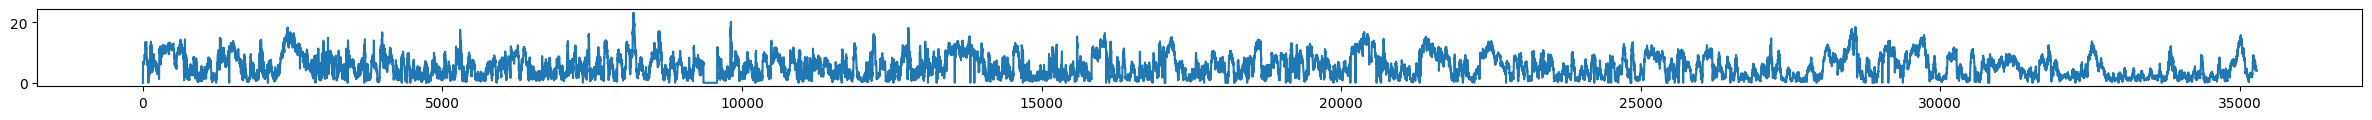

In [8]:
#一号风机的风速
df = pd.read_csv('turb1.csv')
wspd = df['Wspd'].fillna(0).to_numpy().reshape(-1)
plt.figure(figsize=(30,1))
plt.plot(wspd)
plt.show()

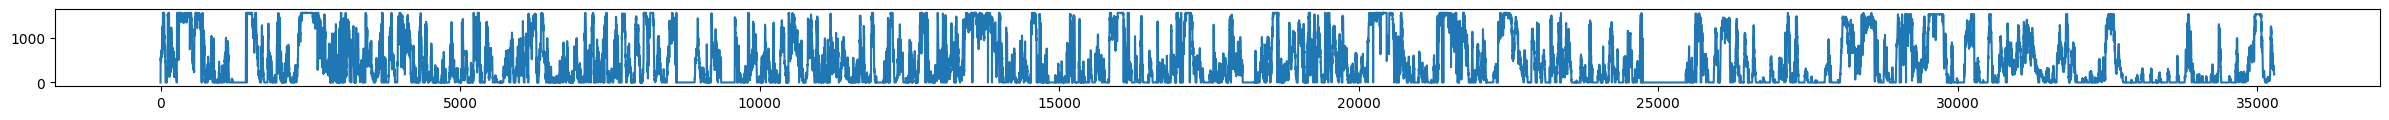

In [10]:
#一号风机的功率
df = pd.read_csv('turb1.csv')
patv = df['Patv'].fillna(0).to_numpy().reshape(-1)
plt.figure(figsize=(30,1))
plt.plot(patv)
plt.show()

宽平稳中有两个条件是均值不变和方差不变，可视化数据中我们可以直观看出来,直接将序列前后拆分成2个序列，分别计算这2个序列的均值、方差，对比看是否差异明显。

In [ ]:
#序列不同时间段的均值、方差
def describe(X):
    split = int(len(X) / 2)
    X1, X2 = X[0:split], X[split:]
    mean1, mean2 = X1.mean(), X2.mean()
    var1, var2 = X1.var(), X2.var()
    print('mean1=%f, mean2=%f' % (mean1, mean2))
    print('variance1=%f, variance2=%f' % (var1, var2))

print('wind speed:')
print('mean=%f,variance=%f' % (wspd.mean(),wspd.var()))
describe(wspd)

print('wind power')
print('mean=%f,variance=%f' % (patv.mean(),patv.var()))
describe(patv)

wind speed:
mean=5.372171,variance=13.316715
mean1=5.504071, mean2=5.240272
variance1=13.460046, variance2=13.138590
wind power
mean=457.739611,variance=275813.575675
mean1=477.853894, mean2=437.625328
variance1=283853.077684, variance2=266964.904892


In [ ]:
#随机抽取一段
X3 = wspd[16666:25999]
X4 = patv[16666:25999]
mean1, mean2 = X3.mean(), X4.mean()
var1, var2 = X3.var(), X4.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=5.791364, mean2=472.206988
variance1=12.943663, variance2=283270.912087


In [ ]:
#随机抽取一段
X3 = wspd[16666:20000]
X4 = patv[16666:20000]
mean1, mean2 = X3.mean(), X4.mean()
var1, var2 = X3.var(), X4.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=5.562475, mean2=459.979874
variance1=11.303839, variance2=249429.947895


平稳序列通常具有短期相关性，对于平稳的时间序列，自相关系数往往会迅速退化到零（滞后期越短相关性越高，滞后期为0时，相关性为1）；而对于非平稳的数据，退化会发生得更慢，或存在先减后增或者周期性的波动等变动。

根据ACF求出滞后k自相关系数时，实际上得到并不是X(t)与X(t-k)之间单纯的相关关系。
因为X(t)同时还会受到中间k-1个随机变量X(t-1)、X(t-2)、……、X(t-k+1)的影响，而这k-1个随机变量又都和X(t-k)具有相关关系，所以自相关系数里面实际掺杂了其他变量对X(t)与X(t-k)的影响。 在剔除了中间k-1个随机变量X(t-1)、X(t-2)、……、X(t-k+1)的干扰之后，X(t-k)对X(t)影响的相关程度，叫偏自相关系数。不同滞后期得到的偏自相关系数，叫偏自相关图。

Text(0.5, 1.0, 'PACF(power)')

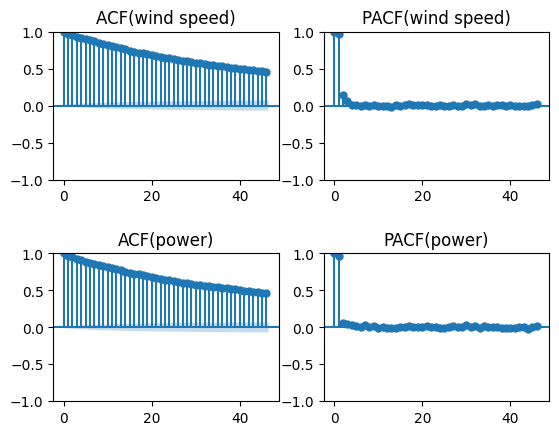

In [7]:
#自相关图检验ACF,PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.5)
plot_acf(wspd, ax=ax[0][0])
ax[0][0].set_title('ACF(wind speed)')
plot_pacf(wspd, ax=ax[0][1])
ax[0][1].set_title('PACF(wind speed)')

plot_acf(patv, ax=ax[1][0])
ax[1][0].set_title('ACF(power)')
plot_pacf(patv, ax=ax[1][1])
ax[1][1].set_title('PACF(power)')

## 假设检验法
平稳性的假设检验方法当前主流为单位根检验，检验序列中是否存在单位根，若存在，则为非平稳序列，不存在则为平稳序列。
### DF检验
ADF检验（Augmented Dickey-Fuller Testing）是最常用的单位根检验方法之一，通过检验序列是否存在单位根来判断序列是否是平稳的。ADF检验是DF检验的增强版。

迪基（Dickey）和弗勒（Fuller）1979年基于非平稳序列的基本特征将其大致归为三类并提出DF检验：
(1) 当序列基本走势呈现无规则上升或下降并反复时，将其归为**无漂移项自回归**过程；
(2) 当序列基本走势呈现明显的随时间递增或递减且趋势并不太陡峭时，将其归为**带漂移项自回归过程**；
(3) 当序列基本走势随时间快速递增时，则将其归为**带趋势项回归过程**。

DF的检验公式为一阶自回归过程，为了能适用于高阶自回归过程的平稳性检验，迪基等1984年对DF检验进行了一定的修正，引入了更高阶的滞后项


In [31]:
#ADF平稳性检验风速
from statsmodels.tsa.stattools import adfuller
testResult = adfuller(wspd)
print(testResult)

(-14.932673595862605, 1.3589544524788544e-27, 31, 35248, {'1%': -3.430535536095368, '5%': -2.861622002387441, '10%': -2.5668136472904126}, 89318.99799772345)


1. -14.932673595862605 同时小于 '1%': -3.430535536095368, '5%': -2.861622002387441, '10%': -2.5668136472904126 说明是平稳的
2. 1.3589544524788544e-27非常接近0，是平稳的

In [37]:
#ADF平稳性检验风速2
from arch.unitroot import ADF
adf = ADF(wspd)
print(adf.summary().as_text)

adf = ADF(wspd,trend='ct')
print(adf.summary().as_text)

<bound method Summary.as_text of <class 'statsmodels.iolib.summary.Summary'>
"""
   Augmented Dickey-Fuller Results   
Test Statistic                -14.933
P-value                         0.000
Lags                               31
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
""">
<bound method Summary.as_text of <class 'statsmodels.iolib.summary.Summary'>
"""
   Augmented Dickey-Fuller Results   
Test Statistic                -15.028
P-value                         0.000
Lags                               31
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.96 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
""">


In [32]:
#ADF平稳性检验功率
from statsmodels.tsa.stattools import adfuller
testResult = adfuller(patv)
print(testResult)

(-14.089968872486743, 2.732608816631215e-26, 45, 35234, {'1%': -3.4305356098222965, '5%': -2.86162203497191, '10%': -2.566813664634277}, 438987.56210192526)


1. -14.089968872486743 同时小于 '1%': -3.4305356098222965, '5%': -2.86162203497191, '10%': -2.566813664634277 说明是平稳的
2. 2.732608816631215e-26非常接近0，是平稳的

In [38]:
#ADF平稳性检验风功率2
from arch.unitroot import ADF
adf = ADF(patv)
print(adf.summary().as_text)
adf = ADF(patv,trend='ct')
print(adf.summary().as_text)

<bound method Summary.as_text of <class 'statsmodels.iolib.summary.Summary'>
"""
   Augmented Dickey-Fuller Results   
Test Statistic                -14.090
P-value                         0.000
Lags                               45
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
""">
<bound method Summary.as_text of <class 'statsmodels.iolib.summary.Summary'>
"""
   Augmented Dickey-Fuller Results   
Test Statistic                -14.154
P-value                         0.000
Lags                               45
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.96 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
""">


## PP检测
Phillips和Perron(1988) 提出一种非参数检验方法，主要是为了解决残差项中潜在的序列相关和异方差问题，其检验统计量的渐进分布和临界值与 ADF检验相同。同样出现较早，假设条件一样，用法相似，可作为ADF检验的补充。

In [40]:
#风速，风功率pp检验
from arch.unitroot import PhillipsPerron
pp = PhillipsPerron(wspd)
print(pp.summary().as_text())

pp = PhillipsPerron(wspd,trend='ct')
print(pp.summary().as_text())

pp = PhillipsPerron(patv)
print(pp.summary().as_text())

pp = PhillipsPerron(patv,trend='ct')
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -22.252
P-value                         0.000
Lags                               53
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-tau)    
Test Statistic                -22.423
P-value                         0.000
Lags                               53
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.96 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
     Phillips-Perron Test (Z-tau)    
Test Statistic                -21.754
P-value                         0.000
Lags                               53
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.8

## DF-GLS检验
DF-GLS检验，是Elliott, Rothenberg, and Stock 1996年提出的一种单位根检验方法，全称Dickey-Fuller Test with GLS Detredding，即“使用广义最小二乘法去除趋势的检验”，是目前最有功效的单位根检验。

DF-GLS检验利用广义最小二乘法，首先对要检验的数据进行一次“准差分”，然后利用准差分的数据对原序列进行去除趋势处理，再利用ADF检验的模型形式对去除趋势后的数据进行单位根检验，但此时ADF检验模型中不再包含常数项或者时间趋势变量。

In [41]:
#DFGLS检测风速
from arch.unitroot import DFGLS
dfgls = DFGLS(wspd)
print(dfgls.summary().as_text())

dfgls = DFGLS(wspd,trend='ct')
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                 -7.697
P-value                         0.000
Lags                               31
-------------------------------------

Trend: Constant
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
      Dickey-Fuller GLS Results      
Test Statistic                -10.955
P-value                         0.000
Lags                               31
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.41 (1%), -2.85 (5%), -2.56 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [42]:
#DFGLS检测功率
from arch.unitroot import DFGLS
dfgls = DFGLS(patv)
print(dfgls.summary().as_text())

dfgls = DFGLS(patv,trend='ct')
print(dfgls.summary().as_text())

      Dickey-Fuller GLS Results      
Test Statistic                 -9.856
P-value                         0.000
Lags                               45
-------------------------------------

Trend: Constant
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
      Dickey-Fuller GLS Results      
Test Statistic                -12.113
P-value                         0.000
Lags                               45
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.41 (1%), -2.85 (5%), -2.56 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


## KPSS检验
另一个著名的单位根存在的检验是Kwiatkowski, Phillips, and Shin 1992年提出的KPSS检验。与以上三种检验方法相比，最大的不同点就是它的原假设是平稳序列或趋势平稳序列，而备择假设是存在单位根。

In [43]:
#KPSS检验风速 p>0.05
from arch.unitroot import KPSS
kpss = KPSS(wspd)
print(kpss.summary().as_text())

kpss = KPSS(wspd,trend='ct')
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.583
P-value                         0.025
Lags                              110
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
    KPSS Stationarity Test Results   
Test Statistic                  0.195
P-value                         0.017
Lags                              110
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [44]:
#KPSS检验功率 p>0.05
from arch.unitroot import KPSS
kpss = KPSS(patv)
print(kpss.summary().as_text())

kpss = KPSS(patv,trend='ct')
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.433
P-value                         0.059
Lags                              110
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
    KPSS Stationarity Test Results   
Test Statistic                  0.138
P-value                         0.063
Lags                              110
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
